# STIS2020S 习题解答
> Haotian Liu, TA, Week 6

## BC Questions
1. 请用不同的电路结构，实现ALLEQ函数。
2. 请实现5个输入的ALLEQ函数。
3. 实现选择器 $f:\{0,1\}^3 \rightarrow \{0,1\}$ s.t.
$$f(a,b,c) = \begin{cases}b & a=1 \\ c & a =0 \end{cases}$$

In [1]:
# utility code 
%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

### Q1 请用不同的电路结构，实现ALLEQ函数。

In [2]:
def ALLEQ_N(a, b, c, d):
    p1 = NAND(a,b)
    p2 = NAND(c,d)
    np1 = NAND(p1, p1)
    np2 = NAND(p2, p2)
    r1 = NAND(np1, np2)
    na = NAND(a,a)
    nb = NAND(b,b)
    nc = NAND(c,c)
    nd = NAND(d,d)
    q1 = NAND(na,nb)
    q2 = NAND(nc,nd)
    nq1 = NAND(q1, q1)
    nq2 = NAND(q2, q2)
    r2 = NAND(nq1, nq2)
    return NAND(r1, r2)

In [3]:
table(ALLEQ_N)

_Input_ | _Output_
--------|---------
  $0000$  | $1$ 
  $0001$  | $0$ 
  $0010$  | $0$ 
  $0011$  | $0$ 
  $0100$  | $0$ 
  $0101$  | $0$ 
  $0110$  | $0$ 
  $0111$  | $0$ 
  $1000$  | $0$ 
  $1001$  | $0$ 
  $1010$  | $0$ 
  $1011$  | $0$ 
  $1100$  | $0$ 
  $1101$  | $0$ 
  $1110$  | $0$ 
  $1111$  | $1$ 


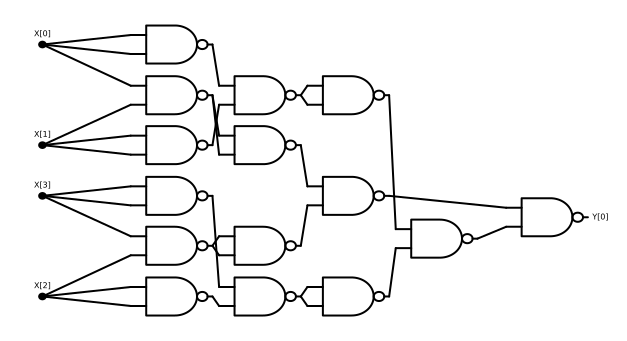

In [4]:
circuit(ALLEQ_N)

### Q2 请实现5个输入的ALLEQ函数。

In [5]:
def ALLEQ5(a, b, c, d, e):
    r1 = AND(AND(AND(a,b),AND(c,d)), e)
    r2 = NOT(OR(OR(OR(a,b),OR(c,d)),e))
    return OR(r1, r2)

In [6]:
table(ALLEQ5)

_Input_ | _Output_
--------|---------
  $00000$  | $1$ 
  $00001$  | $0$ 
  $00010$  | $0$ 
  $00011$  | $0$ 
  $00100$  | $0$ 
  $00101$  | $0$ 
  $00110$  | $0$ 
  $00111$  | $0$ 
  $01000$  | $0$ 
  $01001$  | $0$ 
  $01010$  | $0$ 
  $01011$  | $0$ 
  $01100$  | $0$ 
  $01101$  | $0$ 
  $01110$  | $0$ 
  $01111$  | $0$ 
  $10000$  | $0$ 
  $10001$  | $0$ 
  $10010$  | $0$ 
  $10011$  | $0$ 
  $10100$  | $0$ 
  $10101$  | $0$ 
  $10110$  | $0$ 
  $10111$  | $0$ 
  $11000$  | $0$ 
  $11001$  | $0$ 
  $11010$  | $0$ 
  $11011$  | $0$ 
  $11100$  | $0$ 
  $11101$  | $0$ 
  $11110$  | $0$ 
  $11111$  | $1$ 


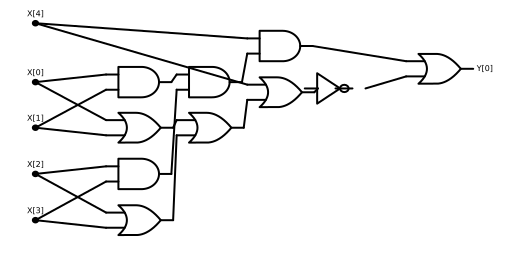

In [7]:
circuit(ALLEQ5)

### Q3 实现选择器
$f:\{0,1\}^3 \rightarrow \{0,1\}$ s.t.
$$f(a,b,c) = \begin{cases}b & a=1 \\ c & a =0 \end{cases}$$

In [8]:
def SEL(a, b, c):
    r1 = AND(a, b)
    r2 = AND(NOT(a), c)
    return OR(r1, r2)

In [9]:
table(SEL)

_Input_ | _Output_
--------|---------
  $000$  | $0$ 
  $001$  | $1$ 
  $010$  | $0$ 
  $011$  | $1$ 
  $100$  | $0$ 
  $101$  | $0$ 
  $110$  | $1$ 
  $111$  | $1$ 


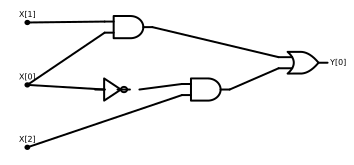

In [10]:
circuit(SEL)

## ANN Questions
用神经网络实现MAJ电路。


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from IPython.display import display, Markdown
import itertools

def table_nn(gate):
    res = r"""
_Input_ | _Output_
--------|---------
"""[1:]
    for X in itertools.product((0,1),repeat=gate.ninput):
        x = "".join([str(b) for b in X])
        output = gate(torch.Tensor([b for b in X]))
        y = round(float(output))
        res += f"  ${x}$  | ${y}$ \n"
    display(Markdown(res))

def zt(*bits):
    return torch.Tensor(bits)

In [12]:
class AND(nn.Module):
    def __init__(self):
        super().__init__()
        self.ninput = 2
        self.weight = torch.Tensor([[20, 20]])
        self.bias = torch.Tensor([-30])

    def forward(self, x):
        x = F.linear(x, self.weight, self.bias)
        x = torch.sigmoid(x)
        return x

class OR(nn.Module):
    def __init__(self):
        super().__init__()
        self.ninput = 2
        self.weight = torch.Tensor([[20, 20]])
        self.bias = torch.Tensor([-10])

    def forward(self, x):
        x = F.linear(x, self.weight, self.bias)
        x = torch.sigmoid(x)
        return x

class NOT(nn.Module):
    def __init__(self):
        super().__init__()
        self.ninput = 1
        self.weight = torch.Tensor([[-20]])
        self.bias = torch.Tensor([10])

    def forward(self, x):
        x = F.linear(x, self.weight, self.bias)
        x = torch.sigmoid(x)
        return x

In [13]:
class MAJ(nn.Module):
    def __init__(self):
        super().__init__()
        self.ninput = 3
        self.and_ = AND()
        self.or_ = OR()

    def forward(self, x):
        t1 = self.and_(zt(x[0], x[1]))
        t2 = self.and_(zt(x[1], x[2]))
        t3 = self.and_(zt(x[0], x[2]))
        y1 = self.or_(zt(t2,t3))
        return self.or_(zt(y1, t1))

In [14]:
table_nn(MAJ())

_Input_ | _Output_
--------|---------
  $000$  | $0$ 
  $001$  | $0$ 
  $010$  | $0$ 
  $011$  | $1$ 
  $100$  | $0$ 
  $101$  | $1$ 
  $110$  | $1$ 
  $111$  | $1$ 


## DNN
打开https://playground.tensorflow.org/, 思考如下几个问题:
1. 调节学习率, 看收敛速度有什么差别
2. 1-2个神经元分别能处理什么样的分类问题
3. 最少需要多少个神经元可解XOR问题
4. 做出螺旋线问题,比比训练速度和神经元数(loss < 0.05)

**下面演示解答前三个问题，第四个请大家做做实验。**